In [1]:
import cv2   
import numpy as np  
import tensorflow as tf 
import matplotlib.pyplot as plt 

In [2]:
#In this code for uisng NMIST datset 

In [5]:
from keras.datasets import fashion_mnist

# Load Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


In [6]:
print('The shape of the training inputs:', X_train.shape)
print('The shape of the training labels:',y_train.shape)
print('The shape of the testing inputs:',X_test.shape)
print('The shape of the testing labels:',y_test.shape)

The shape of the training inputs: (60000, 28, 28)
The shape of the training labels: (60000,)
The shape of the testing inputs: (10000, 28, 28)
The shape of the testing labels: (10000,)


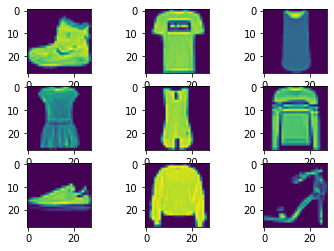

In [7]:
# plotting the first 9 images in the train set of MNIST
 
fig, axs = plt.subplots(3, 3)
cnt = 0
for i in range(3):
     for j in range(3):
         axs[i, j].imshow(X_train[cnt])
         cnt += 1

In [8]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [9]:
model = tf.keras.models.Sequential()

In [10]:
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))   # input layer

In [11]:
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))   # 1st hidden layer
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))   # 2nd hidden layer

In [12]:
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))   # output layer

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(X_train, y_train, epochs=10, batch_size=100)

Epoch 1/10
600/600 [==============================] - 1s 1ms/step - loss: 0.5386 - accuracy: 0.8066
Epoch 2/10
600/600 [==============================] - 1s 1ms/step - loss: 0.3723 - accuracy: 0.8634
Epoch 3/10
600/600 [==============================] - 1s 1ms/step - loss: 0.3333 - accuracy: 0.8781
Epoch 4/10
600/600 [==============================] - 1s 1ms/step - loss: 0.3072 - accuracy: 0.8867
Epoch 5/10
600/600 [==============================] - 1s 1ms/step - loss: 0.2886 - accuracy: 0.8924
Epoch 6/10
600/600 [==============================] - 1s 1ms/step - loss: 0.2734 - accuracy: 0.8976
Epoch 7/10
600/600 [==============================] - 1s 1ms/step - loss: 0.2597 - accuracy: 0.9024
Epoch 8/10
600/600 [==============================] - 1s 1ms/step - loss: 0.2491 - accuracy: 0.9061
Epoch 9/10
600/600 [==============================] - 1s 1ms/step - loss: 0.2371 - accuracy: 0.9105
Epoch 10/10
600/600 [==============================] - 1s 1ms/step - loss: 0.2256 - accuracy: 0.9153

In [16]:
loss, accuracy = model.evaluate(X_test, y_test)
print(loss)
print(accuracy)

313/313 [==============================] - 0s 964us/step - loss: 0.3333 - accuracy: 0.8803
0.3333249092102051
0.880299985408783


In [17]:
prediction = model.predict([X_test])
prediction

313/313 [==============================] - 0s 866us/step


array([[5.0164715e-07, 3.0359434e-10, 4.6720231e-07, ..., 4.0890379e-03,
        5.2598125e-06, 9.9582434e-01],
       [5.9946155e-04, 1.5251734e-08, 9.7883314e-01, ..., 1.9873164e-08,
        1.1109829e-06, 9.1324921e-07],
       [5.8028183e-04, 9.9938428e-01, 2.0041671e-06, ..., 1.5041060e-09,
        3.2177493e-06, 1.5901653e-09],
       ...,
       [6.3028990e-04, 1.0278008e-09, 4.1385280e-04, ..., 5.5596974e-08,
        9.9263269e-01, 2.0085334e-08],
       [1.3845211e-05, 9.9981242e-01, 3.2347565e-05, ..., 7.2204848e-08,
        3.5443009e-06, 5.0056922e-08],
       [2.1209603e-07, 1.2550135e-08, 6.3820033e-07, ..., 7.8202000e-05,
        3.3030552e-05, 2.3322310e-07]], dtype=float32)

In [18]:
# let us do prediction for single image

print('Probabilities: ', prediction[10])
print('\n')
print('Prediction: ', np.argmax(prediction[10]))

Probabilities:  [2.5353322e-04 2.9255339e-06 4.4917885e-02 2.0500511e-05 8.9602697e-01
 7.4382621e-07 5.8746323e-02 1.2016687e-06 2.0645895e-05 9.1745005e-06]


Prediction:  4


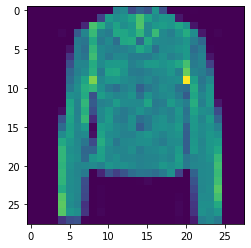

In [19]:
# visualize the image

plt.imshow(X_test[10])
plt.show()